# Data Preparation

In [1]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example: Fetching all games for a particular season
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2022-23')
games = gamefinder.get_data_frames()[0]
game_data = games[['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL']].copy(deep=True)
home_team_data = game_data[game_data['MATCHUP'].str.contains('vs.')].copy(deep=True)
away_team_data = game_data[game_data['MATCHUP'].str.contains('@')].copy(deep=True)
games

home_team_data.rename(columns={'TEAM_ABBREVIATION': 'H_TEAM', "WL" : "H_TEAM_WIN"}, inplace=True)

# encode win/loss as 1/0
# home_team_data['H_TEAM_WIN'] = home_team_data['H_TEAM_WIN'].replace('W', 1)
# home_team_data['H_TEAM_WIN'] = home_team_data['H_TEAM_WIN'].replace('L', 0)

home_team_data

away_team_data.rename(columns={'TEAM_ABBREVIATION': 'A_TEAM'}, inplace=True)
away_team_data.drop(columns=['WL'], inplace=True)
away_team_data

from nba_api.stats.endpoints import leaguegamelog

def past_games_record(row):
    past_games = games[(games['TEAM_ABBREVIATION'] == row['H_TEAM']) & (games['GAME_DATE'] < row['GAME_DATE'])]
    try:
        season_w = past_games['WL'].value_counts()['W']
    except KeyError:
        season_w = 0
    
    try:
        last10_w = past_games['WL'].head(10).value_counts()['W']
    except KeyError:
        last10_w = 0

    try:
        last5_w = past_games['WL'].head(5).value_counts()['W']
    except KeyError:    
        last5_w = 0
    
    opp_team = row['MATCHUP'].split(' ')[2]
    past_mathups = past_games['MATCHUP'].str.contains(opp_team)
    try:
        season_w_opp = past_games[past_mathups]['WL'].value_counts()['W']
    except KeyError:
        season_w_opp = 0

    try:
        last10_w_opp = past_games[past_mathups]['WL'].head(10).value_counts()['W']
    except KeyError:
        last10_w_opp = 0

    try:
        last5 = past_games[past_mathups]['WL'].head(5).value_counts()['W']
    except KeyError:
        last5 = 0

    return season_w, last10_w, last5_w, season_w_opp, last10_w_opp, last5
    return 0, 0, 0, 0, 0, 0

def season_w(row):
    past_games = games[(games['TEAM_ABBREVIATION'] == row['H_TEAM']) & (games['GAME_DATE'] < row['GAME_DATE'])]
    try:
        season_w = past_games['WL'].value_counts()['W']
        # season_l = past_games['WL'].value_counts()['L']
        # season_w = season_w / (season_w + season_l)
    except KeyError:
        season_w = 0
    return season_w

def last10_w(row):
    past_games = games[(games['TEAM_ABBREVIATION'] == row['H_TEAM']) & (games['GAME_DATE'] < row['GAME_DATE'])]
    try:
        last10_w = past_games['WL'].head(10).value_counts()['W']
        # last10_l = past_games['WL'].head(10).value_counts()['L']
        # last10_w = last10_w / (last10_w + last10_l)
    except KeyError:
        last10_w = 0
    return last10_w

def last5_w(row):
    past_games = games[(games['TEAM_ABBREVIATION'] == row['H_TEAM']) & (games['GAME_DATE'] < row['GAME_DATE'])]
    try:
        last5_w = past_games['WL'].head(5).value_counts()['W']
        # last5_l = past_games['WL'].head(5).value_counts()['L']
        # last5_w = last5_w / (last5_w + last5_l)
    except KeyError:
        last5_w = 0
    return last5_w

def season_w_opp(row):
    past_games = games[(games['TEAM_ABBREVIATION'] == row['H_TEAM']) & (games['GAME_DATE'] < row['GAME_DATE'])]
    opp_team = row['MATCHUP'].split(' ')[2]
    past_mathups = past_games['MATCHUP'].str.contains(opp_team)
    try:
        season_w_opp = past_games[past_mathups]['WL'].value_counts()['W']
        # season_l_opp = past_games[past_mathups]['WL'].value_counts()['L']
        # season_w_opp = season_w_opp / (season_w_opp + season_l_opp)
    except KeyError:
        season_w_opp = 0
    return season_w_opp

def last10_w_opp(row):
    past_games = games[(games['TEAM_ABBREVIATION'] == row['H_TEAM']) & (games['GAME_DATE'] < row['GAME_DATE'])]
    opp_team = row['MATCHUP'].split(' ')[2]
    past_mathups = past_games['MATCHUP'].str.contains(opp_team)
    try:
        last10_w_opp = past_games[past_mathups]['WL'].head(10).value_counts()['W']
        # last10_l_opp = past_games[past_mathups]['WL'].head(10).value_counts()['L']
        # last10_w_opp = last10_w_opp / (last10_w_opp + last10_l_opp)
    except KeyError:
        last10_w_opp = 0
    return last10_w_opp

def last5_w_opp(row):
    past_games = games[(games['TEAM_ABBREVIATION'] == row['H_TEAM']) & (games['GAME_DATE'] < row['GAME_DATE'])]
    opp_team = row['MATCHUP'].split(' ')[2]
    past_mathups = past_games['MATCHUP'].str.contains(opp_team)
    try:
        last5_w_opp = past_games[past_mathups]['WL'].head(5).value_counts()['W']
        # last5_l_opp = past_games[past_mathups]['WL'].head(5).value_counts()['L']
        # last5_w_opp = last5_w_opp / (last5_w_opp + last5_l_opp)
    except KeyError:
        last5_w_opp = 0
    return last5_w_opp



home_team_data["SEASON_W"] = home_team_data.apply(season_w, axis=1)
home_team_data["LAST10_W"] = home_team_data.apply(last10_w, axis=1)
home_team_data["LAST5_W"] = home_team_data.apply(last5_w, axis=1)
home_team_data["SEASON_W_OPP"] = home_team_data.apply(season_w_opp, axis=1)
home_team_data["LAST10_W_OPP"] = home_team_data.apply(last10_w_opp, axis=1)
home_team_data["LAST5_W_OPP"] = home_team_data.apply(last5_w_opp, axis=1)

In [2]:
home_team_data["H_TEAM_WIN"].replace('L',0,inplace=True)
home_team_data["H_TEAM_WIN"].replace("W", 1, inplace=True)
home_team_data = home_team_data.reset_index()
del home_team_data["index"]

/tmp/ipykernel_36632/2752628376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  home_team_data["H_TEAM_WIN"].replace('L',0,inplace=True)
/tmp/ipykernel_36632/2752628376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ["SEASON_W","LAST10_W","LAST5_W","SEASON_W_OPP","LAST10_W_OPP","LAST5_W_OPP"]
# using Recursive Feature Elimination (RFE) to get best features
# Apply RFE



In [4]:
from sklearn.feature_selection import RFE
import sklearn.ensemble
import sklearn.linear_model

estimator = sklearn.ensemble.RandomForestRegressor() # using RandomForestRegressor is arbitrary, it worked better than logistic and linear
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(home_team_data[selected_features], home_team_data["H_TEAM_WIN"])
rfe_selected_features = home_team_data.columns[selector.support_]
rfe_selected_features

IndexError: boolean index did not match indexed array along dimension 0; dimension is 13 but corresponding boolean dimension is 6

In [72]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

selected_features = ["SEASON_W","LAST10_W","LAST5_W","SEASON_W_OPP","LAST10_W_OPP","LAST5_W_OPP"]

X_train, X_test, y_train, y_test = train_test_split(home_team_data[selected_features],home_team_data["H_TEAM_WIN"],test_size=0.25,random_state=10)

sm2 = SMOTE(random_state=10, sampling_strategy=0.8)
x_res, y_res = sm2.fit_resample(X_train, y_train)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer, recall_score

param_grid = {
    'C': range(1,100,10),
    'gamma': range(1,100,10),
    'kernel': ['linear', 'rbf']
}

# Create an SVM model
svm = SVC()

# Choose the scoring method
# For recall:
scorer = make_scorer(recall_score,pos_label=1.0)

# For F1 Score:
# scorer = make_scorer(f1_score)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring="accuracy",cv=2,verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

best_model.fit(x_res,y_res)
best_model.score(x_res, y_res)

Fitting 2 folds for each of 200 candidates, totalling 400 fits
Best Parameters: {'C': 1, 'gamma': 11, 'kernel': 'rbf'}
Best Score: 0.5670191823467472


0.8389674247080516

0.5851259987707437

In [40]:
import pandas as pd

# predict data and cross tab
y_pred = best_model.predict(X_test)

pd.crosstab(y_test, y_pred)

col_0,0,1
H_TEAM_WIN,,
0,62,176
1,81,221


In [41]:
import sklearn.metrics as metrics
print('accuracy is ' + str(metrics.accuracy_score(y_test, y_pred)))
print('mae is ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('recall is ' + str(metrics.recall_score(y_test, y_pred, average='weighted')))
print('precision is ' + str(metrics.precision_score(y_test, y_pred, average='weighted')))
print('r2 is ' + str(metrics.r2_score(y_test, y_pred)))


report = metrics.classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

accuracy is 0.524074074074074
mae is 0.4759259259259259
recall is 0.524074074074074
precision is 0.5024160744563767
r2 is -0.9308253102565529
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.26      0.33       238
           1       0.56      0.73      0.63       302

    accuracy                           0.52       540
   macro avg       0.50      0.50      0.48       540
weighted avg       0.50      0.52      0.50       540



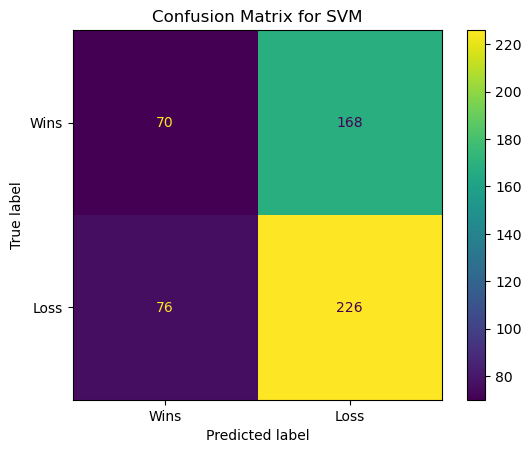

In [32]:
# show a confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=["Wins", "Loss"]
)
cm_display.plot()
plt.title("Confusion Matrix for SVM")
plt.show()